In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1).reset_index(drop=True) # Shuffle the dataframe rows
data = data[:6000]
# We are only going to use a subset of 6000 data samples form the original dataset so that it is easier for us and faster to test the algorithms. 
data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRHRJKC128F426726D,Back in the U.S.S.R.,The Beatles,https://p.scdn.co/mp3-preview/1a7fcc2880a0d9e7...,05zWoNTO4vaCLdnQJvpdiA,"rock, pop, classic_rock, british, 60s",Rock,2011,154479,0.609,...,9,-7.373,1,0.0292,0.19600,0.000644,0.0803,0.756,142.790,4.0
1,TRAMMEJ12903D0A516,I Want You,Kings of Leon,https://p.scdn.co/mp3-preview/8d1707a201d5eaf1...,0HDWhbFlU3QPPFjTCGWk2m,"rock, alternative, indie, alternative_rock, in...",NaN,2008,307453,0.705,...,7,-6.556,1,0.0276,0.11500,0.000763,0.1110,0.384,99.198,4.0
2,TRFPEXC12903CF06CA,The Big Jump,The Chemical Brothers,https://p.scdn.co/mp3-preview/d6ad09c84b2bfc04...,5MI1TpxLiwbZx6tPmlHbJC,"electronic, dance, house, techno, electro",NaN,2005,283946,0.761,...,9,-3.616,1,0.0562,0.00209,0.544000,0.1710,0.563,124.021,4.0
3,TRRGPNE128F9303210,Don't Go Away,Oasis,https://p.scdn.co/mp3-preview/377be09f772382fa...,0goZr16jDmj8QNWDTvOO27,"rock, alternative, indie, alternative_rock, in...",Reggae,1997,288640,0.422,...,0,-4.426,1,0.0364,0.05740,0.000003,0.0798,0.192,81.048,4.0
4,TREHRRC128F931D67C,Only the Good Die Young,Billy Joel,https://p.scdn.co/mp3-preview/e9a8b1f7e760772a...,0g0B9WQETtQVQnyRuHoCFw,"rock, pop, classic_rock, singer_songwriter, 80...",NaN,2004,235586,0.535,...,0,-6.437,1,0.1350,0.17400,0.000000,0.0729,0.743,151.438,4.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             6000 non-null   object 
 1   name                 6000 non-null   object 
 2   artist               6000 non-null   object 
 3   spotify_preview_url  6000 non-null   object 
 4   spotify_id           6000 non-null   object 
 5   tags                 5996 non-null   object 
 6   genre                2623 non-null   object 
 7   year                 6000 non-null   int64  
 8   duration_ms          6000 non-null   int64  
 9   danceability         6000 non-null   float64
 10  energy               6000 non-null   float64
 11  key                  6000 non-null   int64  
 12  loudness             6000 non-null   float64
 13  mode                 6000 non-null   int64  
 14  speechiness          6000 non-null   float64
 15  acousticness         6000 non-null   f

In [12]:
data.describe()

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,2005.289000,2.405318e+05,0.523187,0.696162,5.272667,-7.565508,0.647500,0.063690,0.189034,0.153104,0.203189,0.478691,124.913105,3.929655
std,7.777868,7.906123e+04,0.162043,0.224101,3.568442,3.958577,0.477788,0.059267,0.272567,0.283819,0.172366,0.247284,28.646770,0.342673
min,1958.000000,1.439000e+03,0.000000,0.000020,0.000000,-36.756000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,1.968228e+05,0.418000,0.553000,2.000000,-9.227250,0.000000,0.033575,0.003890,0.000005,0.096300,0.280000,103.547500,4.000000
50%,2007.000000,2.304660e+05,0.525000,0.745000,5.000000,-6.645500,1.000000,0.043200,0.041750,0.000974,0.133000,0.473000,123.654000,4.000000
75%,2010.000000,2.730468e+05,0.637000,0.879000,9.000000,-4.906750,1.000000,0.067800,0.277000,0.129250,0.266000,0.671000,143.360500,4.000000
max,2020.000000,1.525253e+06,0.980000,0.999000,11.000000,0.038000,1.000000,0.849000,0.995000,0.994000,0.998000,0.993000,217.927000,5.000000


We are not going to deal with outliers because it doesn't make sense to have an outlier in such a dataset. Each track has its unique features. If an outlier exists, it could be that the data has some errors, and we cannot check them in the dataset. 

In [13]:
data.isna().sum()

track_id                  0
name                      0
artist                    0
spotify_preview_url       0
spotify_id                0
tags                      4
genre                  3377
year                      0
duration_ms               0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  1
valence                   1
tempo                     1
time_signature            1
dtype: int64

The dataset has some missing values in the 'tags' and 'genre' columns, but we are not going to use those columns in our work, so we are not going to deal with them. For the other missing values, since they are very few we shoudn't worry about them. However, we need to fill them out so that we don't encounter errors later while using preprocessing functions and during the training. One choice of filling them out is with zeros.

In this project, we using 13 audio features associated with each track. These features are numerical representations of the audio characteristics derived from musical theory. They are the following:
- Duration: the duration of the song in milliseconds
- Danceability: a metric for determining how "danceable" a song is. A value of 0.0 is least danceable and 1.0 is most danceable.
- Energy: a subjective assessment of activity and intensity of the song. Its range if [0,1]. Typically, energetic tracks feel fast, loud, and noisy.
- Key: a specific set of pitches or notes that form the basis of a musical composition.
- Loudness: the decibel level of a song.
- Mode: minor or Major mode. It has a significant impact on the mood and tonality of a song.
- Speechiness: the presence of words.
- Acousticness: a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- Instrumentality: whether or not a song has no vocals (pure instrumental).
- Liveness: refers to the presence of an audience in a song, such as at a performance.
- Valence: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
- Tempo: beats per minute (BPM).
- Time signature: a musical notation that appears at the beginning of a piece of sheet music to indicate the rhythmic structure of the music.

In [16]:
# Fill out missing values with 0
data = data.fillna(0)
data.isna().sum()

track_id               0
name                   0
artist                 0
spotify_preview_url    0
spotify_id             0
tags                   0
genre                  0
year                   0
duration_ms            0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64

In [17]:
# Interesting ways to search for data
# source: https://www.kaggle.com/code/caitlyna/music-database-analysis

# Searching by artist name
def get_discography(artist_name):
    discography = data.loc[data.artist == artist_name]   # So interesting how they used data.artist
    return discography

search = get_discography('Radiohead')
search.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
17,TRIOUGL128F9310CA8,Lurgee,Radiohead,https://p.scdn.co/mp3-preview/ae0de4e9b90a15a7...,2B5P22cfUadACK7jLQegU6,"rock, alternative, indie, alternative_rock, in...",Rock,1993,187866,0.420,...,0,-12.298,1,0.0268,0.000135,0.399,0.1110,0.4080,101.900,4.0
179,TRRUIKN128E078218F,Climbing Up the Walls,Radiohead,https://p.scdn.co/mp3-preview/5b1e45987b96b274...,040qcdVdtU2ruOwmG5z0lA,"rock, electronic, alternative, indie, alternat...",Rock,1996,285200,0.172,...,11,-7.476,0,0.0420,0.097100,0.128,0.1950,0.2210,78.653,4.0
183,TRYFDIV128F42BAF81,Fake Plastic Trees,Radiohead,https://p.scdn.co/mp3-preview/9f661dae7578998a...,045sp2JToyTaaKyXkGejPy,"rock, alternative, indie, alternative_rock, in...",Rock,1995,290706,0.454,...,2,-12.592,1,0.0297,0.167000,0.102,0.2020,0.1340,73.552,4.0
187,TRQONHF128F932F091,Videotape,Radiohead,https://p.scdn.co/mp3-preview/797dc80c50b6c78f...,3uxhyRdWVXp7GQvERQl6fA,"rock, alternative, indie, alternative_rock, ex...",0,2007,279634,0.581,...,9,-11.195,1,0.0336,0.697000,0.813,0.0889,0.0466,77.412,4.0
268,TRUOCBA128E07822DF,A Reminder,Radiohead,https://p.scdn.co/mp3-preview/798bb16c6d0b4baa...,0mDwIppo8rIodEVZQ9RBcR,"rock, electronic, alternative, indie, alternat...",Rock,1997,233826,0.313,...,9,-14.112,1,0.0283,0.312000,0.323,0.2560,0.1670,77.851,3.0


In [20]:
# Searching by track_id
def get_song_info(id):
    artist = data.loc[data.track_id == id].artist
    name = data.loc[data.track_id == id].name
    info = pd.merge(artist, name, right_index=True, left_index=True)
    return info

track_id = 'TRFPEXC12903CF06CA'
get_song_info(track_id)

,artist,name
2,The Chemical Brothers,The Big Jump


In [21]:
correlation_matrix = data.corr()
correlation_matrix

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
year,1.000000,-0.061075,0.116289,0.050025,-0.014275,0.223271,-0.058034,-0.008067,-0.012693,-0.075536,-0.028618,-0.004266,0.010896,0.039421
duration_ms,-0.061075,1.000000,-0.062780,-0.047825,0.000198,-0.042520,-0.041626,-0.092890,-0.049797,0.146984,0.059625,-0.226087,-0.023122,-0.032833
danceability,0.116289,-0.062780,1.000000,-0.030499,0.012356,0.037268,-0.054002,-0.001402,-0.019400,-0.045202,-0.140920,0.477162,-0.175707,0.147310
energy,0.050025,-0.047825,-0.030499,1.000000,0.033105,0.765980,-0.028988,0.220224,-0.692951,-0.188608,0.184691,0.316641,0.241978,0.130475
key,-0.014275,0.000198,0.012356,0.033105,1.000000,0.014141,-0.153725,0.017270,-0.042021,0.019725,-0.018399,0.043195,0.020605,0.014047
loudness,0.223271,-0.042520,0.037268,0.765980,0.014141,1.000000,0.001521,0.109151,-0.584022,-0.348741,0.095807,0.233282,0.184259,0.103570
mode,-0.058034,-0.041626,-0.054002,-0.028988,-0.153725,0.001521,1.000000,-0.038775,0.020869,-0.064843,0.003710,-0.011470,-0.000903,-0.010239
speechiness,-0.008067,-0.092890,-0.001402,0.220224,0.017270,0.109151,-0.038775,1.000000,-0.084161,-0.051741,0.131520,0.015595,0.126734,0.013695
acousticness,-0.012693,-0.049797,-0.019400,-0.692951,-0.042021,-0.584022,0.020869,-0.084161,1.000000,0.150219,-0.097026,-0.233151,-0.194032,-0.106709
instrumentalness,-0.075536,0.146984,-0.045202,-0.188608,0.019725,-0.348741,-0.064843,-0.051741,0.150219,1.000000,-0.033277,-0.183862,-0.025564,-0.029594


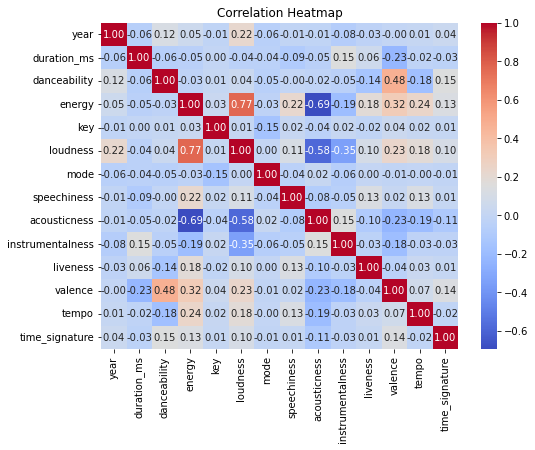

In [22]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The features that are mostly correlated (over (-)0.6) are:
- energy and loudness
- energy and acousticness

So we are going to drop the energy column.

In [23]:
data = data.drop(columns=['energy'])
data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRHRJKC128F426726D,Back in the U.S.S.R.,The Beatles,https://p.scdn.co/mp3-preview/1a7fcc2880a0d9e7...,05zWoNTO4vaCLdnQJvpdiA,"rock, pop, classic_rock, british, 60s",Rock,2011,154479,0.609,9,-7.373,1,0.0292,0.19600,0.000644,0.0803,0.756,142.790,4.0
1,TRAMMEJ12903D0A516,I Want You,Kings of Leon,https://p.scdn.co/mp3-preview/8d1707a201d5eaf1...,0HDWhbFlU3QPPFjTCGWk2m,"rock, alternative, indie, alternative_rock, in...",0,2008,307453,0.705,7,-6.556,1,0.0276,0.11500,0.000763,0.1110,0.384,99.198,4.0
2,TRFPEXC12903CF06CA,The Big Jump,The Chemical Brothers,https://p.scdn.co/mp3-preview/d6ad09c84b2bfc04...,5MI1TpxLiwbZx6tPmlHbJC,"electronic, dance, house, techno, electro",0,2005,283946,0.761,9,-3.616,1,0.0562,0.00209,0.544000,0.1710,0.563,124.021,4.0
3,TRRGPNE128F9303210,Don't Go Away,Oasis,https://p.scdn.co/mp3-preview/377be09f772382fa...,0goZr16jDmj8QNWDTvOO27,"rock, alternative, indie, alternative_rock, in...",Reggae,1997,288640,0.422,0,-4.426,1,0.0364,0.05740,0.000003,0.0798,0.192,81.048,4.0
4,TREHRRC128F931D67C,Only the Good Die Young,Billy Joel,https://p.scdn.co/mp3-preview/e9a8b1f7e760772a...,0g0B9WQETtQVQnyRuHoCFw,"rock, pop, classic_rock, singer_songwriter, 80...",0,2004,235586,0.535,0,-6.437,1,0.1350,0.17400,0.000000,0.0729,0.743,151.438,4.0


Text(0.5, 0, 'Total songs across playlists')

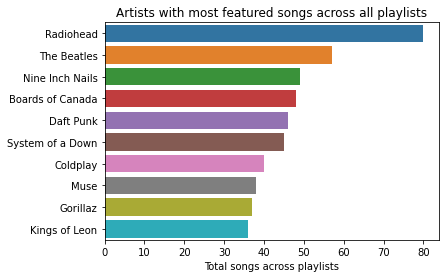

In [32]:
# 10 Artists with most featured songs

values = list(data['artist'].value_counts())
names = data['artist'].value_counts().index.tolist()

ax = sns.barplot(y=names[0:10], x=values[0:10])
ax.set_title('Artists with most featured songs across all playlists')
ax.set_xlabel('Total songs across playlists')

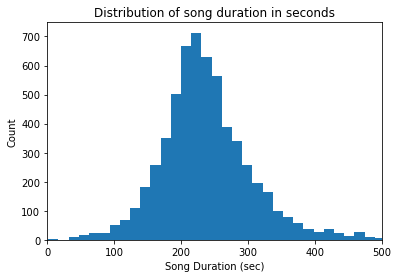

In [27]:
# Distribution of song duration

data['duration_sec'] = data['duration_ms']/1000
plt.title("Distribution of song duration in seconds")
plt.xlabel("Song Duration (sec)")
plt.ylabel("Count")
plt.hist(data.drop_duplicates(['track_id'], keep='first')['duration_sec'], bins = 100)
plt.xlim(0,500)
plt.show()

<AxesSubplot:>

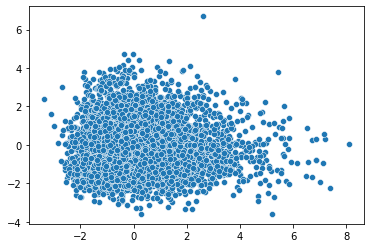

In [34]:
features = ['duration_ms', 'danceability', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']

# Feature scaling
# It's important to scale or normalize continuous features because some algorithms use distance-based metrics for clustering, and features with different scales can dominate the clustering process.

scaler = StandardScaler(with_mean=True, with_std=True).fit(data[features])
scaled_data = scaler.transform(data[features])

# Dimensionality reduction uisng PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
data_2D = pca.transform(scaled_data)

# Visualizing 2D on scatter plot
sns.scatterplot(x=data_2D[:, 0], y=data_2D[:, 1], data=data_2D, legend=None)